# Jigsaw Input and Output

In this notebook, we examine the Jigsaw dataset

In [1]:
# Mount google drive
# Colab initialization
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/ResponsibleDSProject

/content/drive/My Drive/ResponsibleDSProject


## Input and Output

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
test_priv = pd.read_csv('test_private_expanded.csv')

### Describe the Data

The data is comprised of three parts: comment, toxicity label and identity features. Toxicity labeling is a set of binary classifications of whether the comment is toxic. In addition to the overall toxicity, the data has the several subtypes of toxicity:

* severe_toxicity
* obscene
* threat
* insult
* identity_attack
* sexual_explicit

The identity features tell whether annotators marked the comment to contain certain identity features, such as sexual orientation, religion, race and disability status.

The value of identity features are the ratio of annotators who has positively identified the comment to the identity feature.



### How the Data is Collected

Data is collected by sampling questionnaires of up to ten annotators, who answers the degree to which the comment is toxic, and whether there is any identity information in the comment text.

### Input Feature Datatype

The value of toxic labels and identity features are the ratio of annotators who has positively identified the comment to the identity feature.


## Value Distribution

In [5]:
test_priv.columns

Index(['id', 'comment_text', 'created_date', 'publication_id', 'parent_id',
       'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
       'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
       'identity_attack', 'insult', 'threat', 'identity_annotator_count',
       'toxicity_annotator_count', 'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability'],
      dtype='object')

### Missing Values and Value Distribution

Annotations have NaN value when there is no annotation made for a particular category. In such case, we fill in zero values.

Listing all the features, grouping by categories

In [0]:
GENDER_FEATURES = ['male', 'female', 'transgender', 'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation']
RELIGION_FEATURES = ['christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion']
RACE_FEATURES = ['black', 'white', 'asian', 'latino', 'other_race_or_ethnicity']
DISABILITY_FEATURES = ['physical_disability', 'intellectual_or_learning_disability', 'psychiatric_or_mental_illness', 'other_disability']

features_and_labels = [[GENDER_FEATURES, 'Gender'],
                       [RELIGION_FEATURES, 'Religion'],
                       [RACE_FEATURES, 'Race'],
                       [DISABILITY_FEATURES, 'Disability']]

In [0]:
IDENTITY_FEATURES=GENDER_FEATURES+RELIGION_FEATURES+RACE_FEATURES+DISABILITY_FEATURES

In [0]:
test_fillna = test_priv.fillna(value=0)

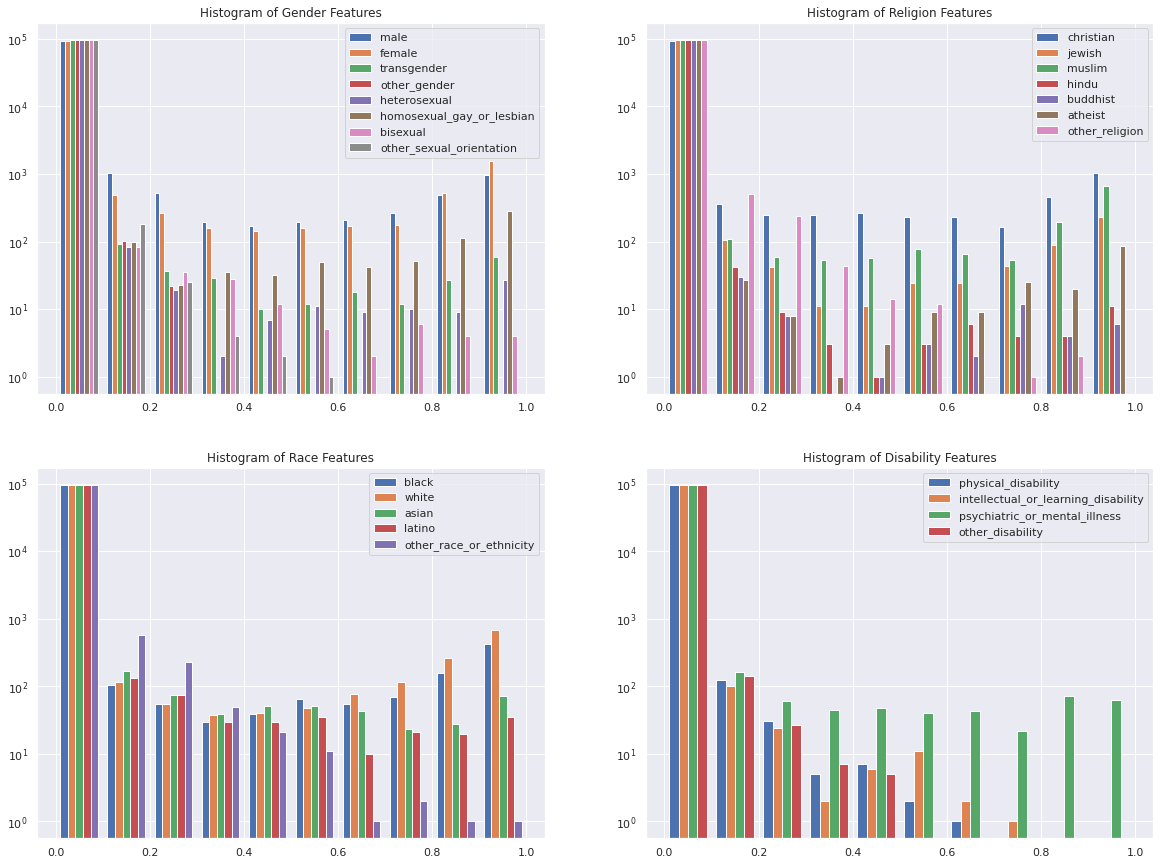

In [9]:
plt.subplots(figsize=(20,15))

i=0
for features, label_name in features_and_labels:
    plt.subplot(f"22{i+1}")
    plt.hist(test_fillna[features].to_numpy(), label=features, bins=10)
    plt.title(f"Histogram of {label_name} Features")
    plt.yscale('log', nonposy='clip')
    plt.legend()
    i+=1

plt.show()

Overall, the identity features are very sparse, as most of the dataset had zero values. We had to plot the histogram on log scale to see the trend.

The identity features are bimodal on two extreme ends. That is, annotators tend to agree on whether the identity was there or not.

### Pairwise Correlation and Other Profiling

In order to assess the correlation between identity label and toxicity level, we plot mean toxicity score vs. identity score cutoff level.

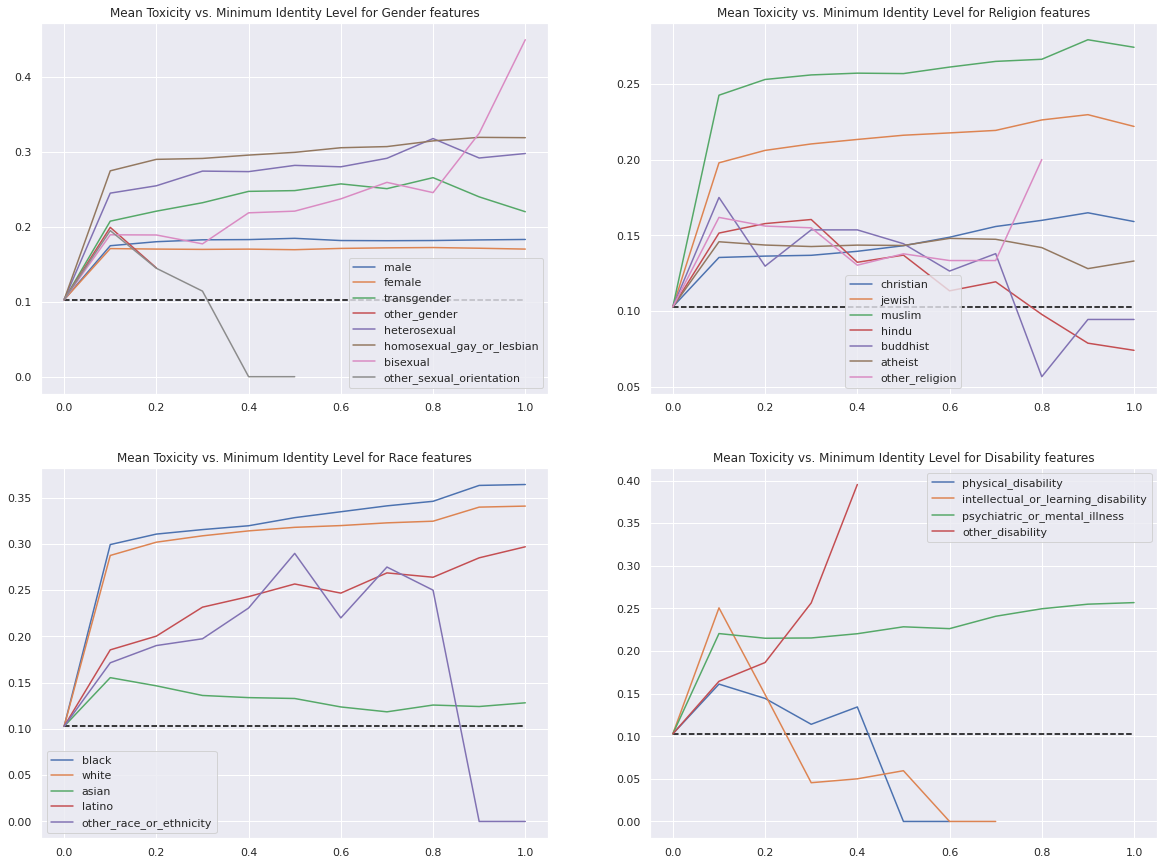

In [10]:
# Idea: plot mean toxicity vs. cut-off rate
global_toxicity_mean = test_fillna['toxicity'].mean()
x_vals = np.linspace(0,1,11)

plt.subplots(figsize=(20,15))

a=0
for features, label_name in features_and_labels:
    pp=np.zeros((len(x_vals), len(features), ))

    for i, f in enumerate(features):
        for j, cutoff in enumerate(x_vals):
            pp[j,i]=test_fillna[test_fillna[f] >= cutoff]['toxicity'].mean()
    
    plt.subplot(f"22{a+1}")
    lns=plt.plot(x_vals, pp)
    plt.hlines(global_toxicity_mean, 0, 1, colors='black', linestyles='dashed')
    plt.legend(lns, features)
    plt.title(f"Mean Toxicity vs. Minimum Identity Level for {label_name} features")
    a=a+1

plt.show()

In [11]:
print(global_toxicity_mean)

0.10281273370157952


## Output of the System

The output of ALD is a toxicity score indicating whether the comment made was toxic.

## Data Example

In [44]:
test_priv[(test_priv['toxicity']>0.8) & (test_priv['female']>0.8) & (test_priv['christian']>0.8)].iloc[0].comment_text

"If what you say is true, it's pretty pathetic that the millenials main understanding about the Catholic church is its teachings on sexuality.  And ironic that the only ones talking about the Church's teachings on sexuality are secular homosexuals and feminists in the media, not the Church.\n\nMeanwhile, countless young women are being pressured into being sexual objects by a culture that equates recreational sex with freedom and equality.  And the guys LOVE it:  No more having to take a girl out to dinner a few times to get into her pants!"

In [45]:
test_priv[(test_priv['toxicity']>0.8) & (test_priv['female']>0.8) & (test_priv['christian']>0.8)].iloc[0]

id                                                                               7186676
comment_text                           If what you say is true, it's pretty pathetic ...
created_date                                               2017-06-23 21:00:28.888517+00
publication_id                                                                        53
parent_id                                                                    5.46691e+06
article_id                                                                        347685
rating                                                                          approved
funny                                                                                  0
wow                                                                                    0
sad                                                                                    0
likes                                                                                  2
disagree             